## How good is the strategy?

#### Import packages

In [72]:
# import data packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from analysis import *

#### Manipualte base data

In [92]:
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['midpoint turnover'] = (all_bets['Midpoint Price'] / all_bets['BSP'])
all_bets['profit/loss'] = np.where(all_bets['WIN_LOSE'] == 1, (0.95 * all_bets['Price'] * 1) - 1, -1)
all_bets['winnings'] = np.where(all_bets['WIN_LOSE'] == 1, (0.95 * all_bets['Price'] * 1), 0)

#let's filter the data to only observations where the price > midpoint price:
midpoint_strat_profit = all_bets[all_bets['Price'] > all_bets['Midpoint Price']]
profit = sum(all_bets['profit/loss'])
winnings = sum(all_bets['winnings'])
returns = profit / len(all_bets) * 100

# let's group the data by characteristics and see if there is a difference in key metrics:
location_returns = all_bets.groupby('Location')['profit/loss'].sum()
location_returns = location_returns.sort_values(ascending=False)

venue_returns = all_bets.groupby('Venue')['profit/loss'].sum()
venue_returns = venue_returns.sort_values(ascending=False)

race_type_returns = all_bets.groupby('Type')['profit/loss'].sum()
race_type_returns = race_type_returns.sort_values(ascending=False)

#### How good are our bets thus far?

In [94]:
print(f'From a total of {len(all_bets)} bets, betting $1 on every horse yielded a total profit of: ${profit}')
print(f'This equates to a return on investment (${len(all_bets)} base investment) of: {round(returns, 3)} percent.')

display(location_returns)
display(venue_returns)
display(race_type_returns)

From a total of 57 bets, betting $1 on every horse yielded a total profit of: $17.6225
This equates to a return on investment ($57 base investment) of: 30.917 percent.


Location
AUS    23.7225
USA    -6.1000
Name: profit/loss, dtype: float64

Venue
Mackay          6.9600
Hobart          6.5000
Addington       6.4500
Ballarat        5.6000
Bathurst        3.1750
Wagga           3.0825
Bendigo         2.2250
Newcastle       1.3250
Albion Park     1.1750
Angle Park      0.4725
Ipswich        -1.0000
Manawatu       -2.0000
Rockhampton    -2.2425
Gawler         -3.0000
Stawell        -5.0000
Charles Town   -6.1000
Name: profit/loss, dtype: float64

Type
RaceType.TROT_RACE         14.3575
RaceType.HORSE_RACE         2.3600
RaceType.GREYHOUND_RACE     0.9050
Name: profit/loss, dtype: float64

#### How indicative of the BSP is the midpoint price?

On average the midpoint price is $0.557 off from the BSP


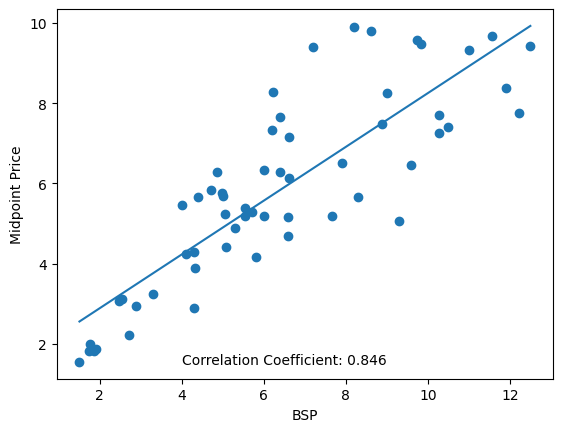

In [83]:
# Let's calculate how far off the midpoint price is from BSP
all_bets['midpoint difference'] = all_bets['BSP'] - all_bets['Midpoint Price']
sum(all_bets['midpoint difference'])

# lets plot the correlation of the BSp with the midpoint price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Midpoint Price'])
plt.xlabel('BSP')
plt.ylabel('Midpoint Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Midpoint Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Midpoint Price"])[0,1], 3)}')
print(f'On average the midpoint price is ${round(np.mean(all_bets["midpoint difference"]), 3)} off from the BSP')

#### How indicative of the BSP is the Betr price?

On average the betr price is $0.204 off from the BSP


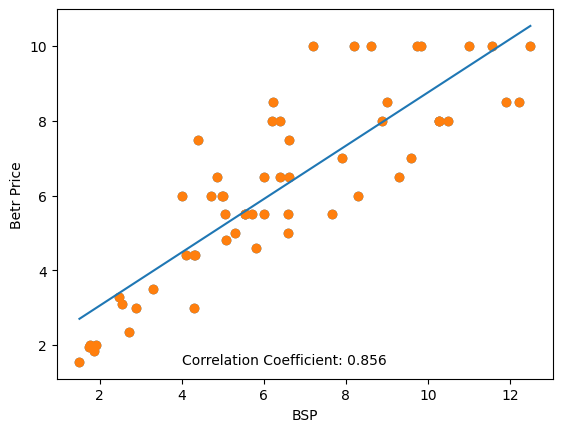

In [84]:
all_bets['betr difference'] = all_bets['BSP'] - all_bets['Price']
sum(all_bets['betr difference'])

# lets plot the correlation of the BSP with the price in the all_bets df using matplot lib:
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.scatter(all_bets['BSP'], all_bets['Price'])
plt.xlabel('BSP')
plt.ylabel('Betr Price')
plt.plot(np.unique(all_bets['BSP']), np.poly1d(np.polyfit(all_bets['BSP'], all_bets['Price'], 1))(np.unique(all_bets['BSP'])))
plt.text(4, 1.5, f'Correlation Coefficient: {round(np.corrcoef(all_bets["BSP"], all_bets["Price"])[0,1], 3)}')
print(f'On average the betr price is ${round(np.mean(all_bets["betr difference"]), 3)} off from the BSP')

### *below is Ben playing around*

#### Profit from all bets- assuming BSP is long run probability. 

In [21]:
print(f'From a total of ({len(all_bets)} bets) the overall turnover for all our bets is: {all_bets.Turnover.mean()}.')
print(f'This would equate to a profit of {round(all_bets.Turnover.mean() * 100 - 100, 3)} percent- (assuming BSP is accurate in long run)')



From a total of (57 bets) the overall turnover for all our bets is: 1.0162206646147807.
This equates to a profit of 1.622 percent.


#### Profit if we had only bet when the price was better than the midpoint price:

In [27]:
print(f'From a total of ({len(midpoint_strat_profit)} bets) the overall turnover for all our bets is: {midpoint_strat_profit.Turnover.mean()}.')
print(f'This equates to a profit of {round(midpoint_strat_profit.Turnover.mean() * 100 - 100, 3)} percent.')

From a total of (56 bets) the overall turnover for all our bets is: 1.0126070313748599.
This equates to a profit of 1.261 percent.
